In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

In [3]:
# Transaction CSVs
train_transaction = pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv')
test_transaction = pd.read_csv('../input/ieee-fraud-detection//test_transaction.csv')
# Identity CSVs - These will be merged onto the transactions to create additional features
train_identity = pd.read_csv('../input/ieee-fraud-detection//train_identity.csv')
test_identity = pd.read_csv('../input/ieee-fraud-detection//test_identity.csv')

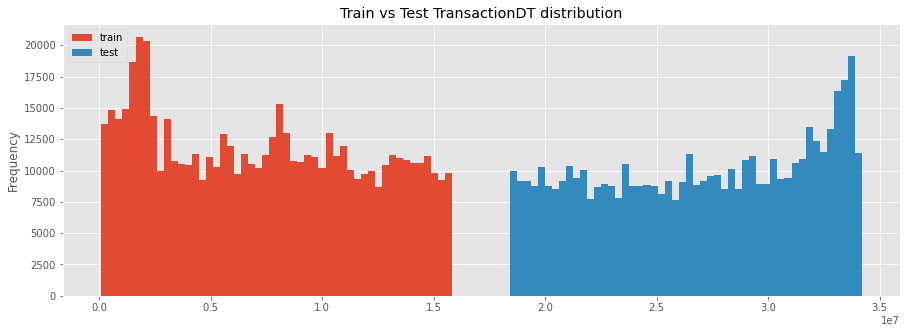

In [4]:
#Train and Test Data are separated by Time.
train_transaction['TransactionDT'].plot(kind='hist',
                                        figsize=(15, 5),
                                        label='train',
                                        bins=50,
                                        title='Train vs Test TransactionDT distribution')
test_transaction['TransactionDT'].plot(kind='hist',
                                       label='test',
                                       bins=50)
plt.legend()
plt.show()

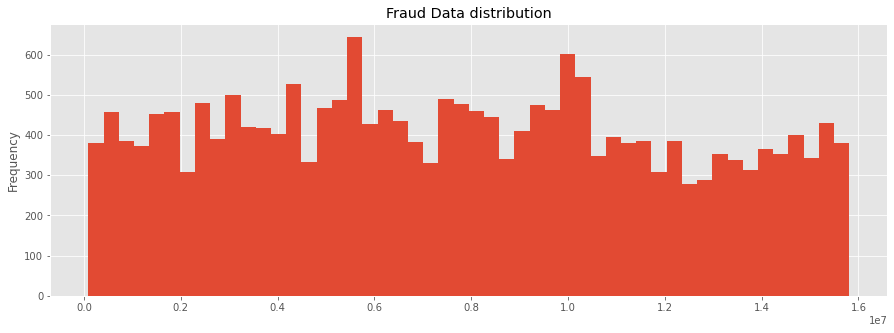

In [5]:
#Fraud data Distributed evenly throughout train data
train_fraud = train_transaction.loc[train_transaction['isFraud'] == 1]
train_fraud['TransactionDT'].plot(kind='hist',
                                        figsize=(15, 5),
                                        label='train',
                                        bins=50,
                                        title='Fraud Data distribution')

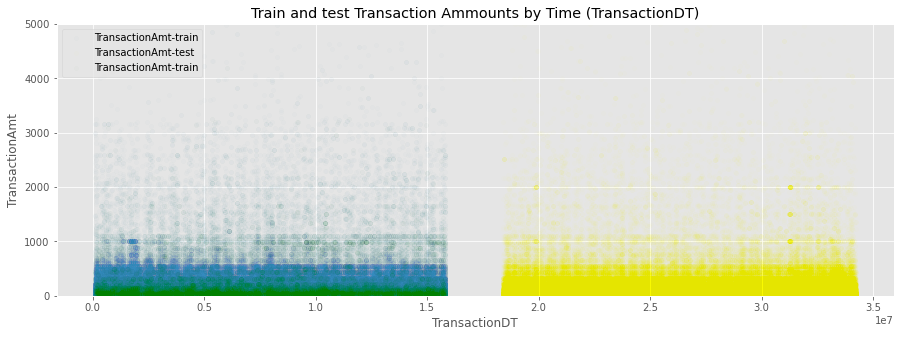

In [6]:
#Transaction Amount - Distribution through transaction DT
ax = train_transaction.plot(
    x="TransactionDT",
    y="TransactionAmt",
    kind="scatter",
    alpha=0.01,
    label="TransactionAmt-train",
    title="Train and test Transaction Ammounts by Time (TransactionDT)",
    ylim=(0, 5000),
    figsize=(15, 5),
)
test_transaction.plot(
    x="TransactionDT",
    y="TransactionAmt",
    kind="scatter",
    label="TransactionAmt-test",
    alpha=0.01,
    color="yellow", 
    ylim=(0, 5000),
    ax=ax,
)
# Plot Fraud as Green
train_transaction.loc[train_transaction["isFraud"] == 1].plot(
    x="TransactionDT",
    y="TransactionAmt",
    kind="scatter",
    alpha=0.01,
    label="TransactionAmt-train",
    title="Train and test Transaction Ammounts by Time (TransactionDT)",
    ylim=(0, 5000),
    color="green",
    figsize=(15, 5),
    ax=ax,
)
plt.show()


**From Figure 1, 2 and 3 we can conclude that Cross Validation split should be done along TransactionDT to get distribution of fraud data evenly.**

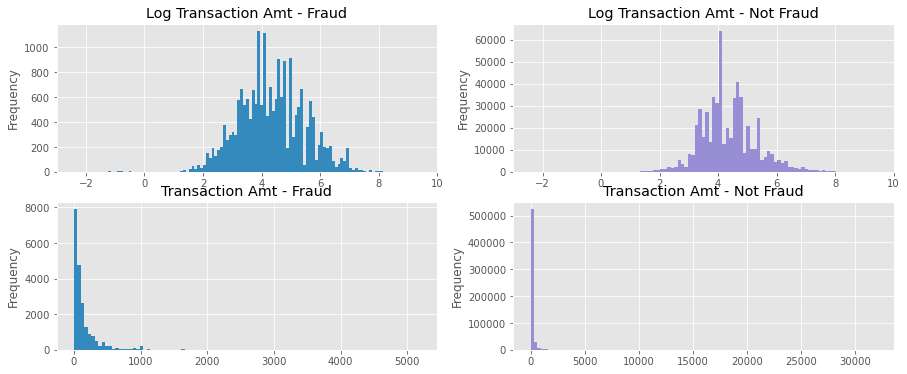

In [7]:
#Plot of Log of Transaction Amount in Fraud and Non Fraud data
#Plot of Actual Transaction Amount in Fraud and Non Fraud data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 6))
train_transaction.loc[train_transaction['isFraud'] == 1] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Fraud',
          color=color_pal[1],
          xlim=(-3, 10),
         ax= ax1)
train_transaction.loc[train_transaction['isFraud'] == 0] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Not Fraud',
          color=color_pal[2],
          xlim=(-3, 10),
         ax=ax2)
train_transaction.loc[train_transaction['isFraud'] == 1] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Fraud',
          color=color_pal[1],
         ax= ax3)
train_transaction.loc[train_transaction['isFraud'] == 0] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Not Fraud',
          color=color_pal[2],
         ax=ax4)
plt.show()


**Actual Transaction amount is skewed in the lower side , Average actual Transaction amount is little bit higher in Fraud data.**

In [8]:
#Merge Data
print('Merging data...')
train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

Merging data...


**Splitting some Categorical Data like Device Information To see if some trend can be observed in subcategorical data**

In [9]:
train['device_name'] = train['DeviceInfo'].str.split(' ', expand=True)[0]

In [10]:
train['id_30_OS'] = train['id_30'].str.split(' ', expand=True)[0]

In [11]:
train['id_30_OS_version'] = train['id_30'].str.split(' ', expand=True)[1]

In [12]:
train['id_31_browser'] = train['id_31'].str.split(' ', expand=True)[0]

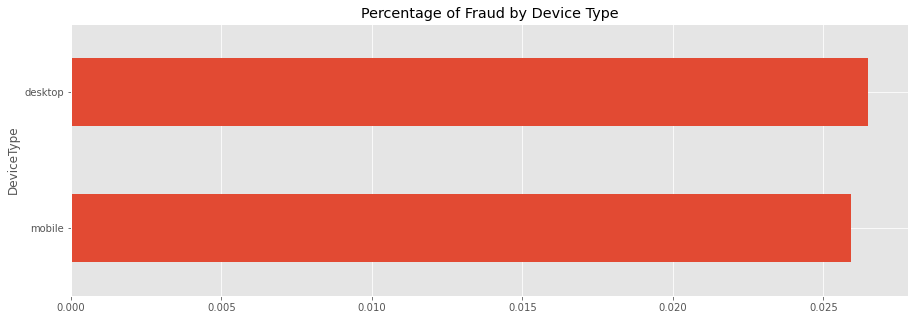

In [13]:
#Percentage of Fraud by Device Type
train.groupby('DeviceType') \
    .mean()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',
          figsize=(15, 5),
          title='Percentage of Fraud by Device Type')
plt.show()

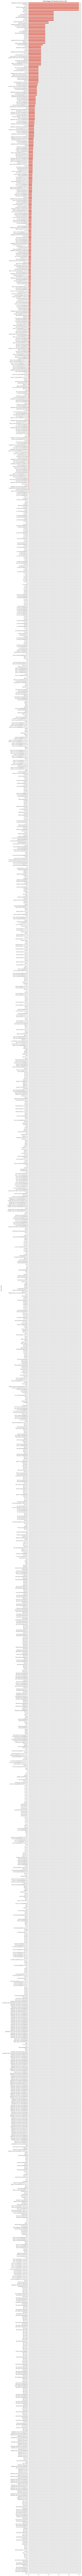

In [14]:
#Percentage of Fraud by Device Info - original data
train.groupby('DeviceInfo') \
    .mean()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',
          figsize=(10, 500),
          title='Percentage of Fraud by Device Info')
plt.show()

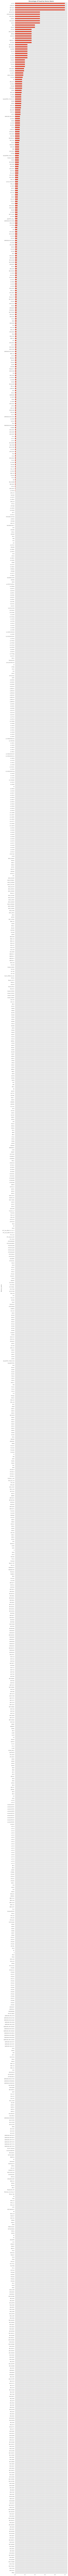

In [15]:
#Percentage of Fraud by Device Name - original data
train.groupby('device_name') \
    .mean()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',
          figsize=(10, 500),
          title='Percentage of Fraud by Device Name')
plt.show()

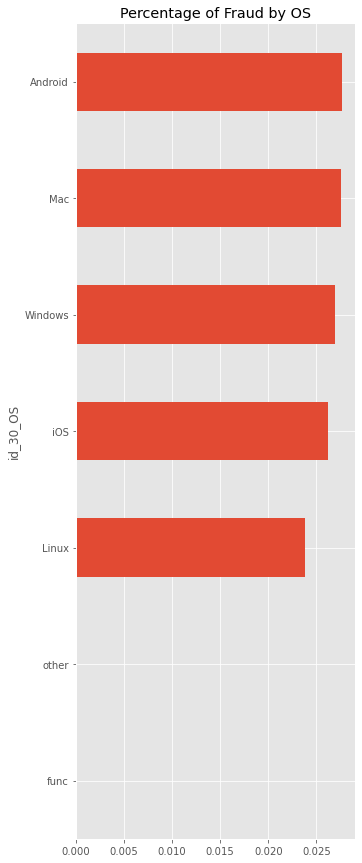

In [16]:
#Percentage of Fraud by OS - subcategorical data
train.groupby('id_30_OS') \
    .mean()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',
          figsize=(5, 15),
          title='Percentage of Fraud by OS')
plt.show()

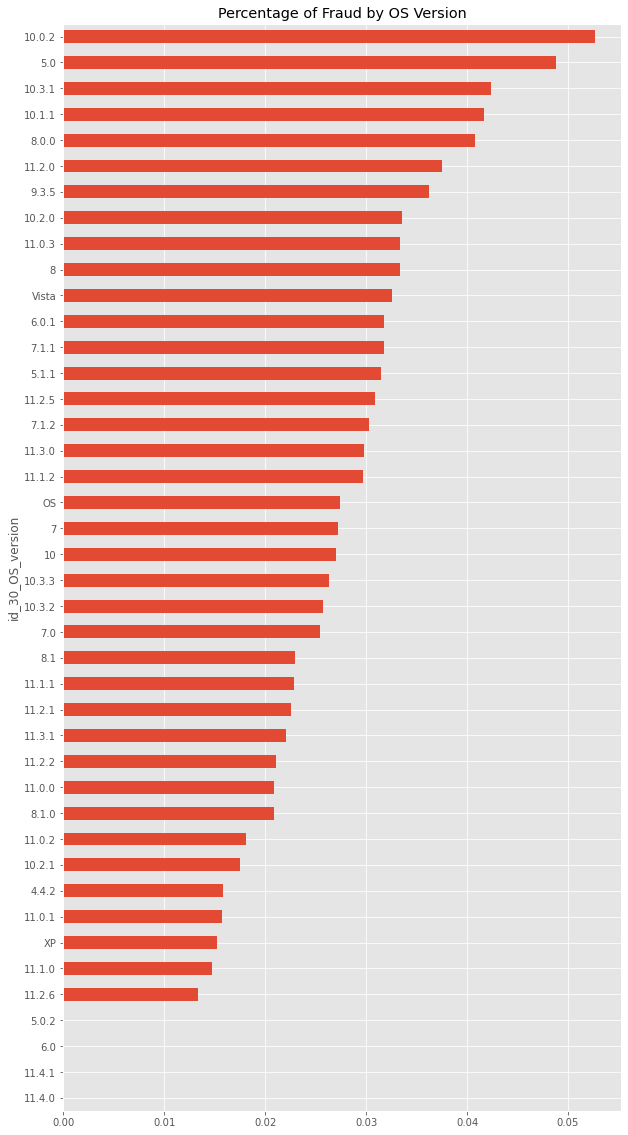

In [17]:
#Percentage of Fraud by OS Version - subcategorical data
train.groupby('id_30_OS_version') \
    .mean()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',
          figsize=(10, 20),
          title='Percentage of Fraud by OS Version')
plt.show()

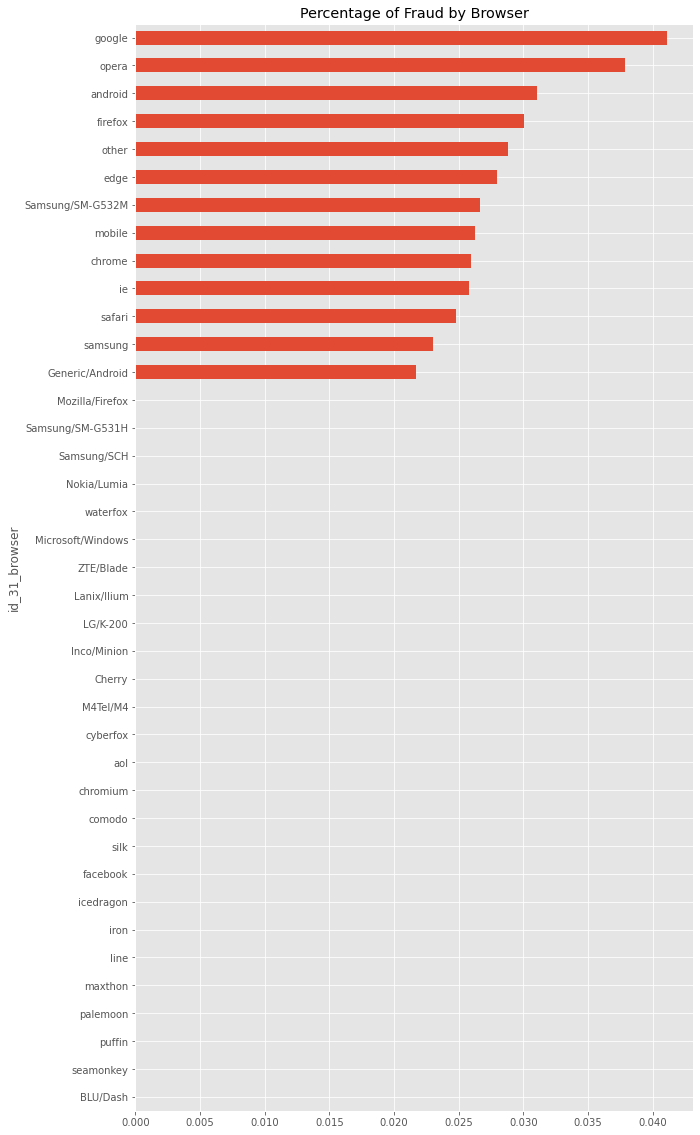

In [18]:
#Percentage of Fraud by Browser Version - subcategorical data
train.groupby('id_31_browser') \
    .mean()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',
          figsize=(10, 20),
          title='Percentage of Fraud by Browser')
plt.show()

In [19]:
#Distribution of Card Type - card4 - in Fraud and Non Fraud data 
card_cols = [c for c in train.columns if 'card' in c]
train[card_cols].head()

card1  card2  card3       card4  card5   card6
0  13926    NaN  150.0    discover  142.0  credit
1   2755  404.0  150.0  mastercard  102.0  credit
2   4663  490.0  150.0        visa  166.0   debit
3  18132  567.0  150.0  mastercard  117.0   debit
4   4497  514.0  150.0  mastercard  102.0  credit

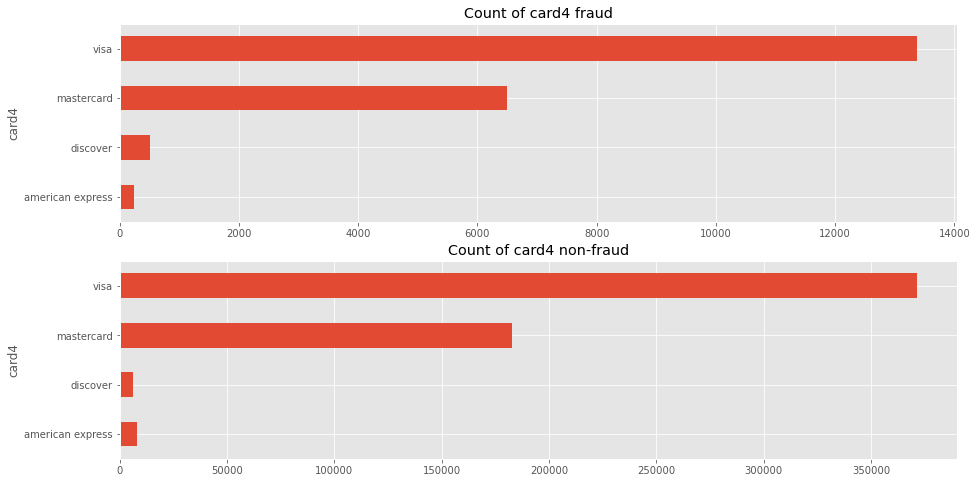

In [20]:
train_transaction_fr = train.loc[train['isFraud'] == 1]
train_transaction_nofr = train.loc[train['isFraud'] == 0]
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
train_transaction_fr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax1, title='Count of card4 fraud')
train_transaction_nofr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax2, title='Count of card4 non-fraud')

**3 Takeaways -

* TransactionDT is marker of time from a starting point - Test data is later than train data. Fraud activity is evenly distributed in the training timeperiod - before Cross Validation split data should be ordered by TransactionDT so that in each fold , fraud data evenly distributed.

* Transaction Amount for Fraud data seems to be little bit high in comparison to non Fraud data.

* Many categorical data should be split into subcategory and grouped together before label encoding.**


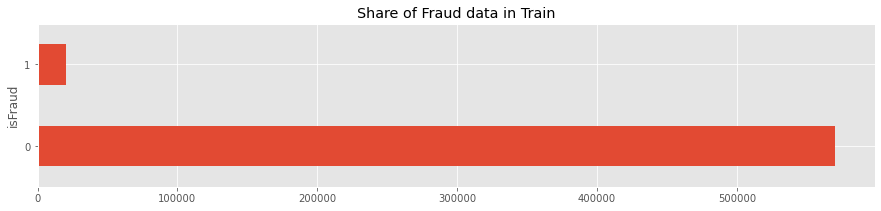

In [23]:
#Share of Fraud data in Train
train.groupby('isFraud') \
    .count()['TransactionID_x'] \
    .plot(kind='barh',
          title='Share of Fraud data in Train',
          figsize=(15, 3))
plt.show()

**Fraud data is small percentage - sampling need to be applied before processing**